# Machine Learning for Aerospace Engineers
### **Homework 2: SVD, Regularization and the Pseudoinverse**


### General Homework Policies 
* You must not import any python libraries unless the question explicitly asks you to do so. 
* Some exercises may have a free response question at the end. We are not looking for anything more than a short paragraph for these questions. In some cases, just a sentence will suffice. 

***
## Exercise 1: Pseudoinverse from the Normal Equations

**15 Points**

In class, we have extensively covered the minimization of the following loss-function to find out $\beta$: 

$$ \mathcal{L}(\beta) = || X \beta - Y||_2^2 $$ 

To recap, this loss-function penalizes the squared 2-norm of the residual of the model's preditions, $X \beta$, and the true outputs, $Y$. We know the $\beta^*$ which minimizes this loss-function is given by the normal equations: 

$$ \beta^* = (X^\top X)^{-1} X^\top Y $$ 

Now suppose we take the singular value-decomposition of $X$: 

$$ X = U \Sigma V^\top $$ 

Recall that the Moore-Penrose Pseudoinverse of $X$ is: 

$$ X^\dagger = V \Sigma^{-1} U^\top $$ 

**Show that we obtain the Moore-Penrose Pseudoinverse by substituting $X$'s SVD into the Normal Equations to find an alternate form of $\beta^*$** 
$$ \beta^* = X^\dagger Y $$ 

Hints: 
* For a unitary-matrix, $A$ we know $A^\top A = I$. 
* Transposing a diagonal matrix does not change it 



**Solution:**

*Answer the question here and use the  $$ notation for the math of your derivation (double-click on the previous cell to see how I did it). See https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf for reference on how to make LaTeX symbols if you're unsure.* 

$$ \begin{align} \beta^* &= (X ^\top X)^{-1} X^\top Y \\ 
    &= (V \Sigma U^\top U \Sigma V^\top)^{-1} V \Sigma U^\top Y \\ 
    &= (V \Sigma^2 V^\top)^{-1} V \Sigma U^\top Y \\ 
    &= V \Sigma^{-2} V^\top V \Sigma U^\top Y \\
    &= V \Sigma^{-2} \Sigma U^\top Y \\ 
    &= V \Sigma^{-1} U^\top Y \\ 
    &= V \Sigma^{-1} U^\top Y \\ 
    &= X^\dagger Y 
\end{align}$$

***
## Exercise 2: Normal Equations for Ridge Regression

**20 Points**

Now let's introduce a new penalty into the least-squares loss-function that also considers the 2-norm of $\beta$ itself: 

$$ \mathcal{L}(\beta) = || X \beta - Y||_2^2 + \lambda || \beta||_2^2 $$ 

Now our loss-function penalizes both "size" of the model error and the "size" of $\beta$. 

**Show that the $\beta$ which minimizes this new loss-function is given by:** 
$$ \beta^* = \left( X^\top X + \lambda I \right)^{-1} X^\top Y $$ 

Hints: 
* Start by expanding the loss-function (Recall that for a vector $v$, $||v||_2^2 = v^\top v $). 
* Once you have the loss-function entirely in terms of matrix-vector multiplication, find its gradient with respect to $\beta$. 
* Once you have the gradient of $\mathcal{L}(\beta)$, set it equal to zero and solve for $\beta$. 


**Solution:**

*Your Answer Here.*

SAMPLE ANSWER: 

Expanding the loss-function: 
$$ \begin{align*} \mathcal{L}(\beta) &=  ||X \beta - Y ||_2^2 + \lambda ||\beta||_2^2 \\ 
    &= (X \beta - Y)^\top (X \beta - Y) + \lambda \beta^\top \beta  \\ 
    &= (\beta^\top X^\top  - Y^\top) (X \beta - Y) + \lambda \beta^\top \beta \\ 
    &= \beta^\top X^\top X \beta - Y^\top X \beta - \beta^\top X^\top Y + Y^\top Y + \lambda \beta^\top \beta\\ 
    &= \beta^\top X^\top X \beta - 2 \beta^\top X^\top Y + Y^\top Y + \lambda \beta^\top \beta \\ 
\end{align*}$$

Differentiating the loss-function: 

$$ \begin{align*}
    \nabla \mathcal{L}(\beta) &= 2 X^\top X \beta - 2 X^\top Y  + 2 \lambda \beta  \\ 
\end{align*} $$

Setting the derivative to zero and solving for $\beta$: 

$$ \begin{align*}
    2 X^\top X \beta - 2 X^\top Y + 2 \lambda \beta  &= 0\\
    X^\top X \beta + \lambda \beta &= X^\top Y \\ 
    \left( X^\top X  + \lambda I \right) \beta &= X^\top Y \\ 
    \beta &= \left( X^\top X  + \lambda I \right)^{-1} X^\top Y 
\end{align*} $$

***
## Exercise 3: The Achilles Heel of Linear Regression
**10 Points**

Through this example, we see how small changes in our $X$ and $Y$ matrices can have *huge* consequences on our computed linear regression weights. This can be the result of noise or corruption in our training data. Let's examine a simple 2x2 example of how regularization works. Consider the following $X \beta = Y$ system:  

$$ \begin{bmatrix} 1 & 100 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} \beta_1 \\ \beta_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$ 

Our matrix $X$ is rank-deficient which means there are infinitely many solutions to this system. The minimum-norm solution to this system is: 

$$ \beta^\dagger = X^\dagger Y = \begin{bmatrix} 1/1001 \\ 100 / 1001 \end{bmatrix} \approx \begin{bmatrix} 0.001 \\ 0.1 \end{bmatrix} $$ 

Now let's consider *perturbing* the matrix $X$ by some small, positive $\varepsilon$. 

$$ \begin{bmatrix} 1 & 100 \\ 0 & \varepsilon \end{bmatrix} \begin{bmatrix} \beta_1 \\ \beta_2 \end{bmatrix} = \begin{bmatrix} 1 \\ \varepsilon \end{bmatrix} $$ 

With the addition of this tiny $\varepsilon$, this system is now full-rank which means there is only one solution. 

**By hand, solve for $\beta_\varepsilon$ (the solution to the perturbed system). How does this $\beta_\varepsilon$ compare to the original $\beta^\dagger$? What does this say about the stability of linear regression in the presence of small perturbations?** 

**Solution:**

*Your Answer Here.*

SAMPLE ANSWER: 
$$ \begin{bmatrix} 1 & 100 \\ 0 & \varepsilon \end{bmatrix} \begin{bmatrix} \beta_1 \\ \beta_2 \end{bmatrix} = \begin{bmatrix} 1 \\ \varepsilon \end{bmatrix} $$

$$ 1 \beta_1 + 100 \beta_2 = 1 $$ 
$$ \varepsilon \beta_2 = \varepsilon $$ 

Our second equation only involves $\beta_2$ s we can directly solve: 

$$ \beta_2 = \frac{\varepsilon}{\varepsilon} = 1 $$ 

Now we can substitute into our first equation: 

$$ \beta_1 + 100 \beta_2 = \beta_1 + 100 = 1 $$ 

Hence, $\beta_1 = -99$. So this makes our $\beta_{\varepsilon} = \begin{bmatrix} -99 \\ 1 \end{bmatrix}$. 


***
## Exercise 4: Regularization to Combat Instability from Perturbation
**10 Points**

Now we'll explore regularization as a stratgegy to combat this behavior. We have provided some code and set $\varepsilon=0.01$. We've defined a `lambda_vals` list which contains logarithmically spaced values of $\lambda$ from $10^{-9}$ to $10^5$. To get credit for this exercise: 

* Compute the SVD of X using `np.linalg.svd(X)`. 
* Loop through the `lambda_vals` vector of regularization parameters to try out. 
* For each loop iteration, solve for $\beta_\varepsilon$ using the regularized Normal Equations (do not use `np.linalg.inv()` ): 
$$ \beta_{\varepsilon} = (X^\top X + \lambda I)^{-1} X^\top Y $$ 
* For each loop iteration, compute the error between $X \beta_\varepsilon$ and $Y$. Append this value to the `errors` list. 
$$ \text{error} = ||X \beta_{\varepsilon} - Y||_2^2 $$ 

* For each loop iteration, compute the 2-norm of $\beta_{\varepsilon}$ and append it to the `norms` list. 
* Make a plot with the error values on the y-axis and the norms of $\beta$ on the x-axis using the `plt.loglog` function for logarithmically scaled x and y axes. Add appropriate axis labels, a grid, and a title. 

Text(0.5, 1.0, 'Residual Error vs. Magnitude of beta')

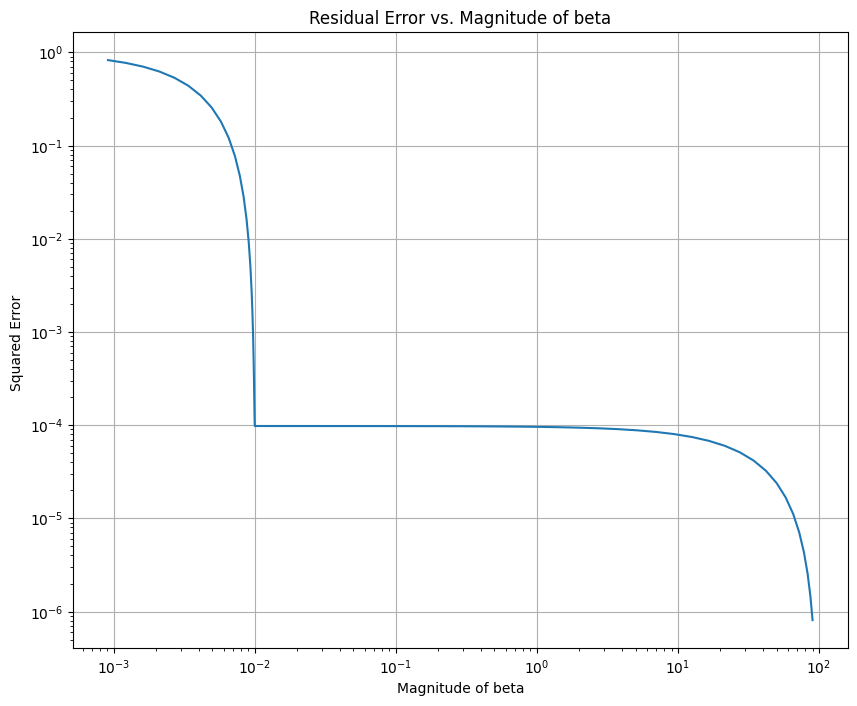

In [118]:
## CODE PROVIDED; DO NOT MODIFY ---------------------

import matplotlib.pyplot as plt
import numpy as np

# We have set the epsilon to 0.01 
eps = 0.01
# The perturbed X 
X = np.array([
    [1, 100], 
    [0, eps]
])

# The perturbed Y 
Y = np.array([
    1, eps 
])

lambda_vals = np.logspace(-9, 5, 100)

errors = []
norms = []

## BEGIN YOUR CODE: ---------------------------------




# Compute the SVD of X 
U, S, Vt = np.linalg.svd(X) 

# Loop through the values in lambda_vals 
for lambda_val in lambda_vals:
    # Solve for beta using the pseudoinverse definition above 
    beta = np.linalg.solve(X.T @ X + lambda_val * np.eye(2), X.T @ Y )
    # Compute the 2-norm of the residual X beta - Y 
    error = np.linalg.norm(X @ beta - Y)**2

    # Append the error to the errors list and the 2-norm of beta to the norms list
    errors.append(error)
    norms.append(np.linalg.norm(beta))

# Plot the 2-norms of beta on the x-axis and the 2-norms of the residuals on the y-axis
plt.figure(figsize=(10,8), dpi=100)
plt.grid()
plt.loglog(norms, errors)
plt.xlabel("Magnitude of beta")
plt.ylabel("Squared Error ")
plt.title("Residual Error vs. Magnitude of beta")

### **Free Response:** Explain the trend in this plot. What does this tell us about how we should choose our $\lambda$ to get as close to the original $\beta^\dagger$ as we can?   

*Your response here*

***
## Exercise 5: Overfitting Revisited 

**20 Points**

We can also use regularization when we have an extremely expressive model. Recall the 1-D Bernoulli equation: 

$$ P_1 + \frac{1}{2} \rho v_1^2 + \rho g h_1 = P_2 + \frac{1}{2} \rho v_2^2 + \rho g h_2 $$ 

Let's say we wish to approximate the pressure $P_2$ and we have experimental measurements of $P_1, \rho, v_1$, and $v_2$. We have given you some starter code to generate the data you need. Do not modify this code. You've been given an `X_df` and `Y_df` which contain the input data and output data. To get full credit for this exercise, you must: 

* Load in the `BernoulliData.csv` file into your notebook as a pandas dataframe. 

* Create an `X_df` containing the `P1`, `rho`, `v1`, `v2` columns. Create a `Y_df` containing the `P2` column. 

* Split the `X_df` and `Y_df` dataframes into train and test sets with 80% of the training data used to train a linear regression model. Name these new arrays `Xtrain`, `Xtest`, `Ytrain`, `Ytest`. You may copy the code we used in Homework 1. Set the `random_state=42` for repeatability. 

* Import the `PolynomialFeatures` class from the `sklearn` library. Use this module to transform your data to have degree-3 polynomial features. You my also use the code from Homework 1. 

* Define a function called `mean_absolute_error` which takes in a `Ytrue` and a `Yhat` and computes the Mean Absolute Error between them. 

* Compute a `beta_hat` using the normal equations (no regularization)

* Compute a `Yhat_train` vector to store the model's predictions for the `Xtrain` data. 

* Compute a `Yhat_test` vector to store the model's predictions for the `Xtest` data. 

* Print out the 2-norm of `beta_hat`.

* Print out the MAE between `Ytrain` and `Yhat_train` using your `mean_absolute_error` function. 

* Print out the MAE between `Ytest` and `Yhat_test` using your `mean_absolute_error` function. 

* Plot a scatterplot with `Yhat_train` and `Ytrain` on the X and Y axes, respectively. Color these points blue. On the same plot, plot a scatterplot of `Yhat_test` and `Ytest` on the X and Y axes, respectively. Add appropriate axis labels, a grid, **a legend**, and a title. 

2-Norm of beta: 289.603
Training MAE:   0.709
Testing  MAE:   19.440


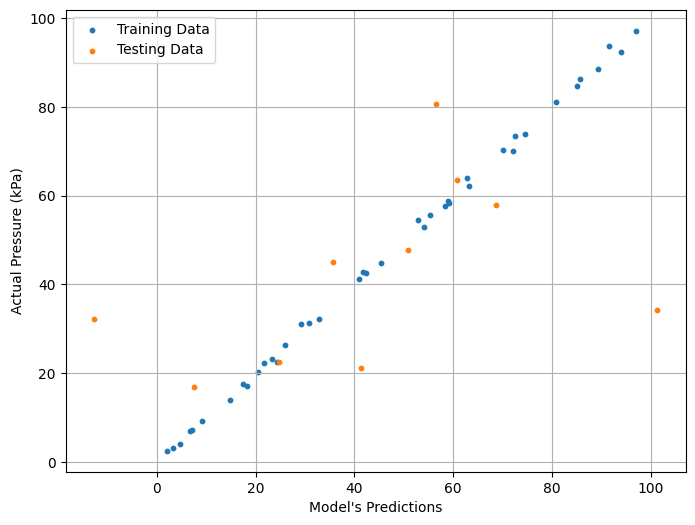

In [92]:
import pandas as pd 

# Load the 'BernoulliData.csv' file into your workspace as a pandas dataframe 
df = pd.read_csv("BernoulliData.csv")

# Create an `X_df` containing the `P1`, `rho`, `v1`, `v2` columns. Create a `Y_df` containing the `P2` column. 
X_df = df[['P1', 'rho', 'v1', 'v2']]
Y_df = df['P2']

# Split the X_df and Y_df into Xtrain, Xtest, Ytrain, Ytest numpy arrays 

from sklearn.model_selection import train_test_split 

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_df.values, Y_df.values, test_size=0.20, random_state = 42)

# Use PolynomialFeatures from sklearn.preprocessing to create degree-3 polynomial features 
from sklearn.preprocessing import PolynomialFeatures
 
features = PolynomialFeatures(degree = 3)
Xtrain = features.fit_transform(Xtrain)
Xtest = features.fit_transform(Xtest)

# Create a function called mean_absolute_error() to compute the MAE between some Ytrue and Yhat vectors
def mean_absolute_error(Ytrue, Yhat):
    return np.sum(np.abs(Ytrue.ravel() - Yhat.ravel())) / (np.size(Ytrue))

# Compute a beta_hat using ordinary least-squares/the normal equations without any regularization 

beta_hat = np.linalg.solve(Xtrain.T @ Xtrain, Xtrain.T @ Ytrain)

# Use this beta_hat to make predictions on the training and testing inputs. Call these predictions Yhat_train and Yhat_test
Yhat_train = Xtrain @ beta_hat 
Yhat_test = Xtest @ beta_hat 

# Print out the 2-norm of beta_hat 
print("2-Norm of beta: %.3f" % (np.linalg.norm(beta_hat)))

# Print out the training and testing MAE for the model 
print("Training MAE:   %.3f" % (mean_absolute_error(Ytrain, Yhat_train)))
print("Testing  MAE:   %.3f" % (mean_absolute_error(Ytest, Yhat_test)))

# Make a scatterplot containing the Yhat_train and Yhat_test on the X-Axis and Ytrain and Ytest on the Y-Axis 
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(Yhat_train, Ytrain, s = 10.0, label = "Training Data")
plt.scatter(Yhat_test, Ytest, s = 10.0, label = "Testing Data")
plt.grid()
plt.xlabel("Model's Predictions")
plt.ylabel("Actual Pressure (kPa)")
plt.legend()

### **Free Response:** In your own words, interpret the MAE for the training and testing data. How did our simple linear regression model perform? Why? Be specific. What does the 2-norm of $\hat{\beta}$ tell us? 

*Your response here*

***
## Exercise 6: Regularization to Combat Overfitting

**20 Points**

Now that we know our model isn't performing well on unseen data, let's employ regularization to fix it. To get full credit for this exercise, you must: 

* Define a `lambda_val` variable as our regularization parameter. 

* Compute a new `beta_hat` using the regularized normal equations i.e. $\hat{\beta} = (X^\top X + \lambda I)^{-1} X^\top Y $. 

* Compute a new `Yhat_train` vector to store the model's predictions for the `Xtrain` data. 

* Compute a new `Yhat_test` vector to store the model's predictions for the `Xtest` data. 

* Print out the new 2-norm of `beta_hat`.

* Print out the new MAE between `Ytrain` and `Yhat_train` using your `mean_absolute_error` function. 

* Print out the new MAE between `Ytest` and `Yhat_test` using your `mean_absolute_error` function. 

* Plot a scatterplot with `Yhat_train` and `Ytrain` on the X and Y axes, respectively. Color these points blue. On the same plot, plot a scatterplot of `Yhat_test` and `Ytest` on the X and Y axes, respectively. Add appropriate axis labels, a grid, **a legend**, and a title. 

* Repeat this process using different values of `lambda_val` until the training MAE is roughly equal to the test MAE (within $\pm 3$ of each other is fine)

2-Norm of beta: 0.00000
Training MAE:  6.840
Testing  MAE:  8.158


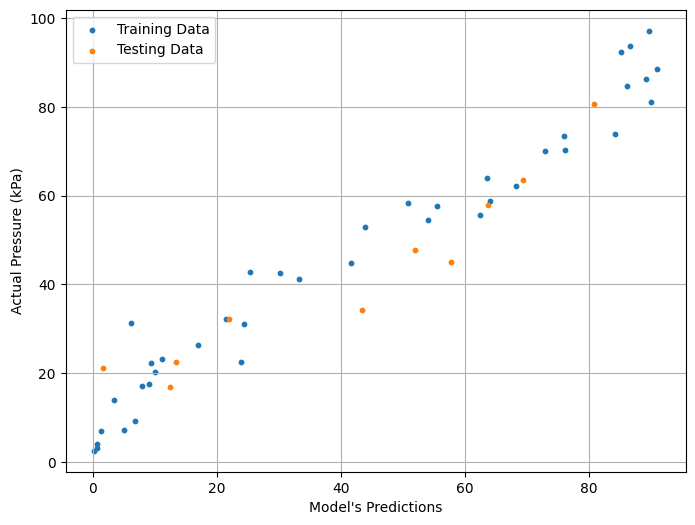

In [124]:
# Compute a new beta_hat using the regularized normal equations 

lambda_val = 1e18
beta_hat = np.linalg.solve(Xtrain.T @ Xtrain + lambda_val * np.eye(Xtrain.shape[1]), Xtrain.T @ Ytrain)

# Use this beta_hat to make predictions on the training and testing inputs. Call these predictions Yhat_train and Yhat_test
Yhat_train = Xtrain @ beta_hat 
Yhat_test = Xtest @ beta_hat 

# Print out the 2-norm of beta_hat 
print("2-Norm of beta: %.5f" % (np.linalg.norm(beta_hat)))

# Print out the training and testing MAE for the model 
print("Training MAE:  %.3f" % (mean_absolute_error(Ytrain, Yhat_train)))
print("Testing  MAE:  %.3f" % (mean_absolute_error(Ytest, Yhat_test)))

# Make a scatterplot containing the Yhat_train and Yhat_test on the X-Axis and Ytrain and Ytest on the Y-Axis 
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(Yhat_train, Ytrain, s = 10.0, label = "Training Data")
plt.scatter(Yhat_test, Ytest, s = 10.0, label = "Testing Data")
plt.grid()
plt.xlabel("Model's Predictions")
plt.ylabel("Actual Pressure (kPa)")
plt.legend()

### **Free Response:** 
* **What value of `lambda_val` did you end up choosing?** 
* **Is this larger or smaller than you expected?** 
* **How does our training MAE with regularization compare to our training MAE without regularization?** 
* **What is the 2-norm of the regularized $\hat{\beta}$? How does it compare to the unregularized $\hat{\beta}$?** 
* **What ingredient of the regression problem does regularization change? Give justification using the theory from class.** 

*Your response here*